In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('nyc-rolling-sales_03-21.csv')

## Preview Data

In [2]:
data.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376.0,43.0,NaN,S1,743 EAST 6TH STREET,NaN,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1.0,S1,3200000.0,2019-07-24
1,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390.0,61.0,NaN,A4,189 EAST 7TH STREET,NaN,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1.0,A4,0.0,2019-09-25
2,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404.0,1.0,NaN,B9,166 AVENUE A,NaN,...,2.0,0.0,2.0,1510.0,4520.0,1900.0,1.0,B9,0.0,2019-07-22
3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,56.0,NaN,C0,263 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,2430.0,3600.0,1899.0,1.0,C0,6300000.0,2019-04-30
4,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393.0,9.0,NaN,C0,604 EAST 11TH STREET,NaN,...,3.0,0.0,3.0,2375.0,5110.0,1939.0,1.0,C0,0.0,2019-10-24


In [3]:
print(data.info())
print(data.convert_dtypes().dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767986 entries, 0 to 1767985
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   BOROUGH                         float64
 1   NEIGHBORHOOD                    object 
 2   BUILDING CLASS CATEGORY         object 
 3   TAX CLASS AT PRESENT            object 
 4   BLOCK                           float64
 5   LOT                             float64
 6   EASE-MENT                       object 
 7   BUILDING CLASS AT PRESENT       object 
 8   ADDRESS                         object 
 9   APARTMENT NUMBER                object 
 10  ZIP CODE                        float64
 11  RESIDENTIAL UNITS               float64
 12  COMMERCIAL UNITS                float64
 13  TOTAL UNITS                     float64
 14  LAND SQUARE FEET                float64
 15  GROSS SQUARE FEET               float64
 16  YEAR BUILT                      float64
 17  TAX CLASS AT TIME OF SALE  

## Clean Data

In [4]:
## Clean Data

# drop sales with price 0
zero_sales = len(data[data['SALE PRICE'] == 0]) + data['SALE PRICE'].isna().sum()
registers_orig = data.shape[0]
print("Total number of registers:", (registers_orig))
print("Total number of NULL registers:", (zero_sales))
print(" % of null registers: {:.2f}".format((zero_sales/registers_orig)*100))
clean_data = data[data['SALE PRICE'] != 0].dropna(axis=0, how='any', subset='SALE PRICE')

# drop the null values
total_reg = clean_data.shape[0]
print("Total number of VALID registers:", total_reg)
print(" % of valid registers: {:.2f}".format((total_reg/registers_orig)*100))
clean_data.head()

Total number of registers: 1767986
Total number of NULL registers: 533990
 % of null registers: 30.20
Total number of VALID registers: 1233996
 % of valid registers: 69.80


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376.0,43.0,NaN,S1,743 EAST 6TH STREET,NaN,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1.0,S1,3200000.0,2019-07-24
3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,56.0,NaN,C0,263 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,2430.0,3600.0,1899.0,1.0,C0,6300000.0,2019-04-30
5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,372.0,23.0,NaN,C1,300 EAST 3RD STREET,NaN,...,12.0,0.0,12.0,2393.0,7989.0,2001.0,2.0,C1,1950000.0,2019-08-08
6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,373.0,19.0,NaN,C7,332 EAST 4TH STREET,NaN,...,28.0,2.0,30.0,4651.0,17478.0,1920.0,2.0,C7,14000000.0,2019-01-09
8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,376.0,23.0,NaN,C3,"262 EAST 7TH STREET, 4",NaN,...,4.0,0.0,4.0,2059.0,4154.0,1900.0,2.0,C3,600000.0,2019-12-12


In [5]:
# Check pricing for registers

reg_under_10 = len(clean_data[(clean_data['SALE PRICE']<10000)])
reg_under_100 = len(clean_data[(clean_data['SALE PRICE']<100000)])

print("Total registers below $10k: {:,}".format(reg_under_10))
print(" % of registers below $10k considering the clean dataset {:.2f}".format(reg_under_10*100/total_reg))
print(" % of registers below $10k considering the original dataset {:.2f}".format(reg_under_10*100/registers_orig))

print("Total registers below $100k: {:,}".format(reg_under_100))
print(" % of registers below $100k considering the clean dataset {:.2f}".format(reg_under_100*100/total_reg))
print(" % of registers below $100k considering the original dataset {:.2f}".format(reg_under_100*100/registers_orig))

Total registers below $10k: 29,809
 % of registers below $10k considering the clean dataset 2.42
 % of registers below $10k considering the original dataset 1.69
Total registers below $100k: 99,147
 % of registers below $100k considering the clean dataset 8.03
 % of registers below $100k considering the original dataset 5.61


In [6]:
# Add Borough Names for interpretability
borough_names = ["MANHATTAN", "BRONX", "BROOKLYN", "QUEENS", "STATEN ISLAND"]
borough_name_data = [borough_names[int(i)-1] for i in clean_data["BOROUGH"]]
clean_data.insert(loc=1, column='BOROUGH_NAME', value=borough_name_data)

# Clean Neighborhood whitespaces
clean_data["NEIGHBORHOOD"] = clean_data["NEIGHBORHOOD"].str.replace(" ", "")

# Add Sale Year column for analysis
sale_year_data = []
for i, date in enumerate(clean_data["SALE DATE"]):
    sale_year_data.append(date.split("-")[0])
clean_data["SALE YEAR"] = sale_year_data

In [7]:
clean_data.columns

Index(['BOROUGH', 'BOROUGH_NAME', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'SALE YEAR'],
      dtype='object')

## Helper Functions

In [8]:
def get_saleprice_stats_groupby(data, column_name):
    mean_price = data.groupby([column_name])["SALE PRICE"].mean()
    median_price = data.groupby([column_name])["SALE PRICE"].median()
    min_price = data.groupby([column_name])["SALE PRICE"].min()
    max_price = data.groupby([column_name])["SALE PRICE"].max()
    return mean_price, median_price, min_price, max_price 

## Analysis

### Sales prices based on location

##### By Borough

In [9]:
print("Number of Boroughs:", len(borough_names))
print("Names of Boroughs:\n", borough_names)

# Get data per borough
borough_clean_data = {}
for borough in borough_names:
    borough_clean_data[borough] = clean_data[clean_data["BOROUGH_NAME"] == borough]

Number of Boroughs: 5
Names of Boroughs:
 ['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND']


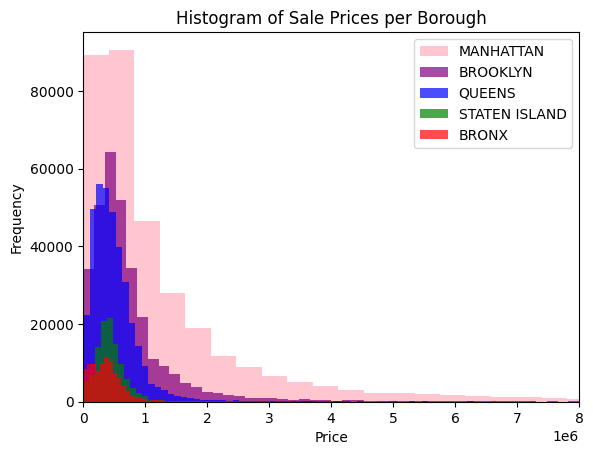

In [17]:
# Plot histogram of sale prices per borough
plt.hist(borough_clean_data["MANHATTAN"]["SALE PRICE"], bins=10000, label="MANHATTAN", alpha=0.9, color="pink")
plt.hist(borough_clean_data["BROOKLYN"]["SALE PRICE"], bins=5000, label="BROOKLYN", alpha=0.7, color="purple")
plt.hist(borough_clean_data["QUEENS"]["SALE PRICE"], bins=5000, label="QUEENS", alpha=0.7, color="blue")
plt.hist(borough_clean_data["STATEN ISLAND"]["SALE PRICE"], bins=2000, label="STATEN ISLAND", alpha=0.7, color="green")
plt.hist(borough_clean_data["BRONX"]["SALE PRICE"], bins=2000, label="BRONX", alpha=0.7, color="red")
plt.xlim([0,0.8e7])
plt.title("Histogram of Sale Prices per Borough")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Mean, Median, Min, Max - Per Borough


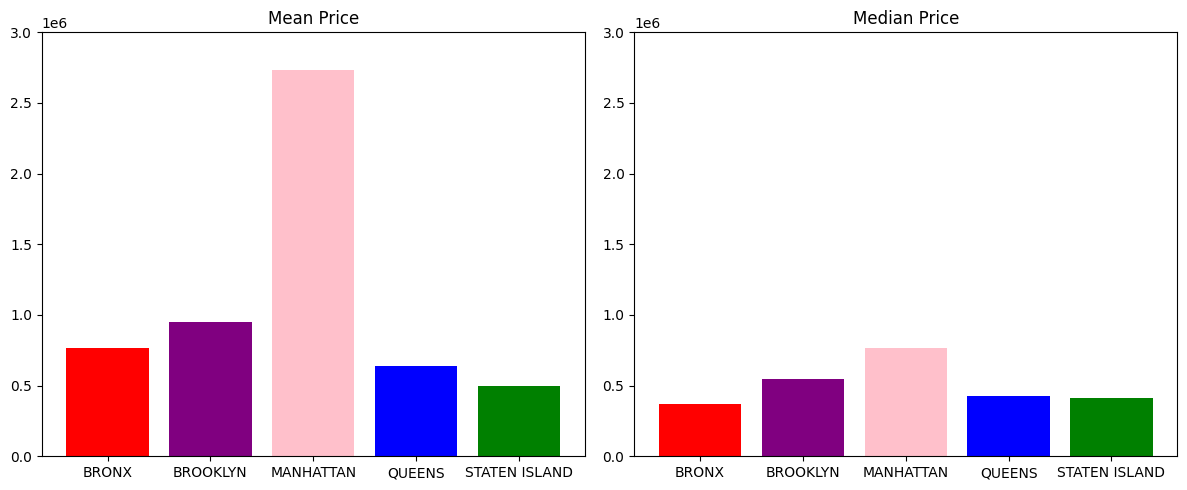

Minimum Prices
BOROUGH_NAME
BRONX            1.0
BROOKLYN         1.0
MANHATTAN        1.0
QUEENS           1.0
STATEN ISLAND    1.0
Name: SALE PRICE, dtype: float64

Maximum Prices
BOROUGH_NAME
BRONX            1.372983e+08
BROOKLYN         8.696129e+08
MANHATTAN        4.111112e+09
QUEENS           5.249157e+08
STATEN ISLAND    1.894423e+08
Name: SALE PRICE, dtype: float64


In [11]:
# Plot bar graphs of sale prices per borough
print("Mean, Median, Min, Max - Per Borough")
print("="*100)
mean_price_b, median_price_b, min_price_b, max_price_b = get_saleprice_stats_groupby(clean_data, "BOROUGH_NAME")

fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout = True)
min_ylim = 0
max_ylim = 3e6
# Mean Prices for Boroughs
ax[0].bar(mean_price_b.index, mean_price_b.values, color=["red", "purple", "pink", "blue", "green"])
ax[0].set_title("Mean Price")
ax[0].set_ylim([min_ylim, max_ylim])
# Median Prices for Boroughs
ax[1].bar(median_price_b.index, median_price_b.values, color=["red", "purple", "pink", "blue", "green"])
ax[1].set_title("Median Price")
ax[1].set_ylim([min_ylim, max_ylim])
plt.show()
# Minimum Prices for Boroughs
print("Minimum Prices")
print(min_price_b)
print()
# Maximum Prices for Boroughs
print("Maximum Prices")
print(max_price_b)



##### By Neigherborhood

In [12]:
print("Number of Neighborhoods: ", len(clean_data["NEIGHBORHOOD"].unique()))
print("Names of Neighborhoods:\n", sorted(clean_data["NEIGHBORHOOD"].unique()))

Number of Neighborhoods:  264
Names of Neighborhoods:
 ['3004', 'AIRPORTJFK', 'AIRPORTLAGUARDIA', 'ALPHABETCITY', 'ANNADALE', 'ARDENHEIGHTS', 'ARROCHAR', 'ARROCHAR-SHOREACRES', 'ARVERNE', 'ASTORIA', 'BATHBEACH', 'BATHGATE', 'BAYCHESTER', 'BAYRIDGE', 'BAYSIDE', 'BEDFORDPARK/NORWOOD', 'BEDFORDSTUYVESANT', 'BEECHHURST', 'BELLEHARBOR', 'BELLEROSE', 'BELMONT', 'BENSONHURST', 'BERGENBEACH', 'BLOOMFIELD', 'BOERUMHILL', 'BOROUGHPARK', 'BREEZYPOINT', 'BRIARWOOD', 'BRIGHTONBEACH', 'BROADCHANNEL', 'BRONX-UNKNOWN', 'BRONXDALE', 'BRONXPARK', 'BROOKLYN-UNKNOWN', 'BROOKLYNHEIGHTS', 'BROWNSVILLE', 'BULLSHEAD', 'BUSHTERMINAL', 'BUSHWICK', 'CAMBRIAHEIGHTS', 'CANARSIE', 'CARROLLGARDENS', 'CASTLEHILL/UNIONPORT', 'CASTLETONCORNERS', 'CHELSEA', 'CHINATOWN', 'CITYISLAND', 'CITYISLAND-PELHAMSTRIP', 'CIVICCENTER', 'CLINTON', 'CLINTONHILL', 'CLOVELAKES', 'CO-OPCITY', 'COBBLEHILL', 'COBBLEHILL-WEST', 'COLLEGEPOINT', 'CONCORD', 'CONCORD-FOXHILLS', 'CONEYISLAND', 'CORONA', 'COUNTRYCLUB', 'CROTONAPARK', 'CROWNHEIGH

Mean, Median - Per Neighborhood


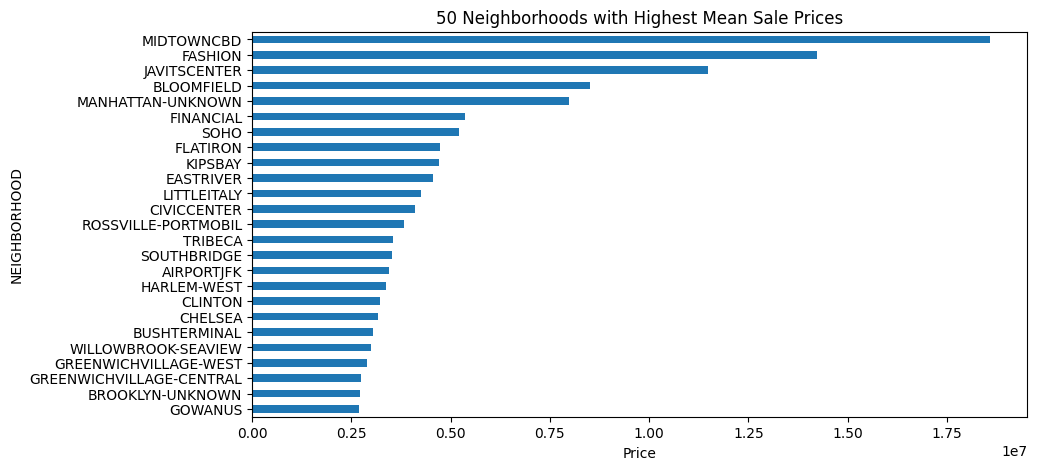

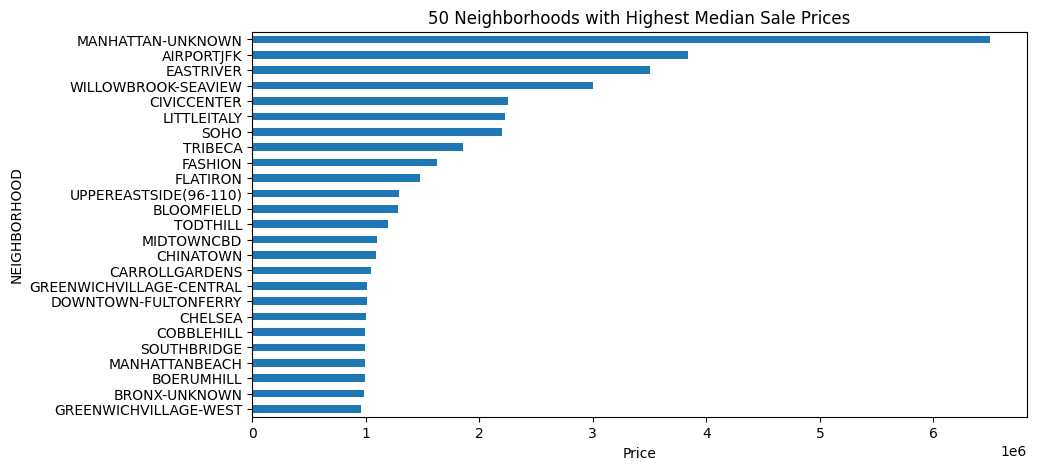

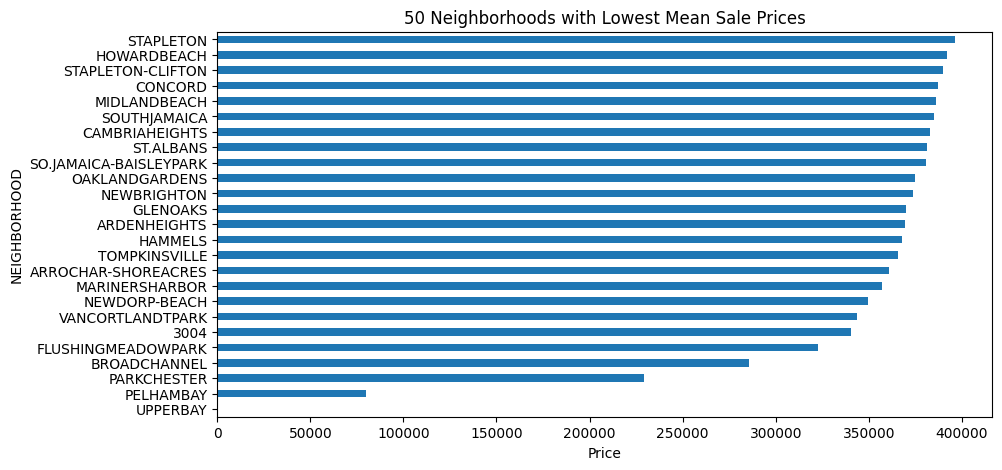

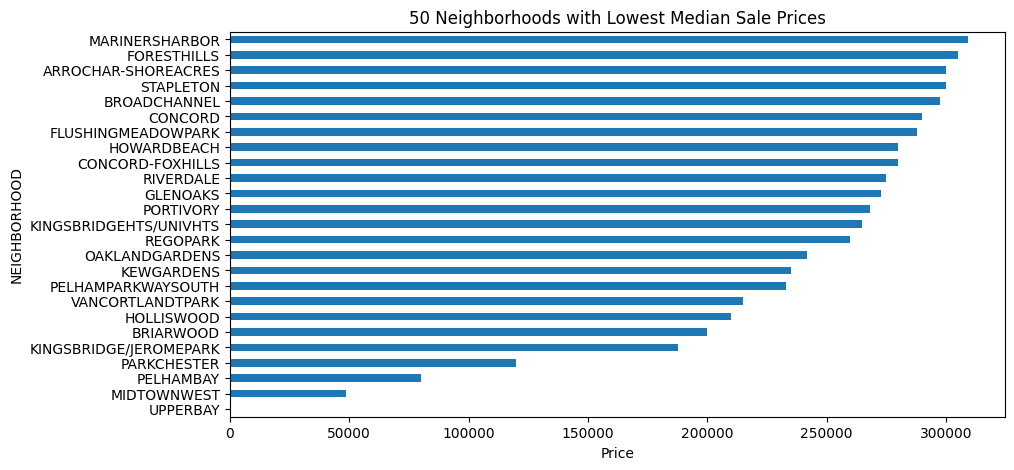

In [13]:
# Plot bar graphs of sale prices per for most/least expensive neighborhoods
print("Mean, Median - Per Neighborhood")
print("="*100)
mean_price_n, median_price_n, _, _ = get_saleprice_stats_groupby(clean_data, "NEIGHBORHOOD")
mean_price_n = mean_price_n.sort_values(ascending=True)
median_price_n = median_price_n.sort_values(ascending=True)
n = 25
figsize = (10,5)

# Highest Mean Sales Prices
fig = plt.figure(figsize=figsize)
mean_price_n[-n:].plot(kind='barh')
plt.title("50 Neighborhoods with Highest Mean Sale Prices")
plt.xlabel("Price")
plt.show()

# Highest Median Sales Prices
fig = plt.figure(figsize=figsize)
median_price_n[-n:].plot(kind='barh')
plt.title("50 Neighborhoods with Highest Median Sale Prices")
plt.xlabel("Price")
plt.show()

# Lowest Mean Sales Prices
fig = plt.figure(figsize=figsize)
mean_price_n[:n].plot(kind='barh')
plt.title("50 Neighborhoods with Lowest Mean Sale Prices")
plt.xlabel("Price")
plt.show()

# Lowest Median Sales Prices
fig = plt.figure(figsize=figsize)
median_price_n[:n].plot(kind='barh')
plt.title("50 Neighborhoods with Lowest Median Sale Prices")
plt.xlabel("Price")
plt.show()


### Sales over 2003-2021

#### How Borough Prices have changed overtime

In [14]:
# Get mean and median data per borough, grouped by sale year
borough_mean_data = {}
borough_median_data = {}
for borough in borough_names:
    mean_price, median_price, _, _ = get_saleprice_stats_groupby(borough_clean_data[borough], "SALE YEAR")
    borough_mean_data[borough] = mean_price
    borough_median_data[borough] = median_price

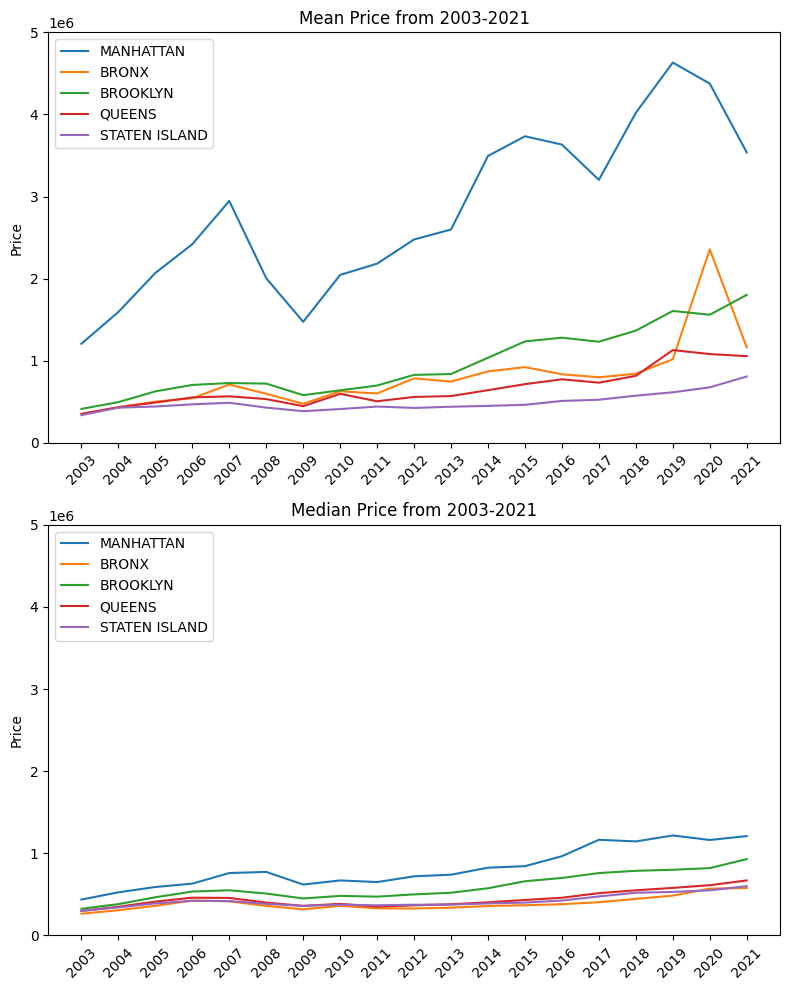

In [19]:
# Plot Mean and Median sale prices over the years, per borough
figsize = (8,10)
fig, ax = plt.subplots(2, 1, figsize=figsize, tight_layout = True)
min_ylim = 0
max_ylim = 5e6

# Mean Prices for Manhattan
for borough in borough_names:
    ax[0].plot(borough_mean_data[borough], label=borough)
ax[0].set_title("Mean Price from 2003-2021")
ax[0].set_ylabel("Price")
ax[0].set_ylim([min_ylim, max_ylim])
plt.sca(ax[0])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

# Median Prices for Manhattan
for borough in borough_names:
    ax[1].plot(borough_median_data[borough], label=borough)
ax[1].set_title("Median Price from 2003-2021")
ax[1].set_ylabel("Price")
ax[1].set_ylim([min_ylim, max_ylim])
plt.sca(ax[1])
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### How Neighborhood Prices have changed overtime

In [16]:
# TODO